<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/DC_PC/NGC6822_DC_PC_00015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1228, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 1228 (delta 100), reused 60 (delta 60), pack-reused 1066
Receiving objects: 100% (1228/1228), 101.14 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (601/601), done.
Updating files: 100% (138/138), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.00015
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/final_data_v2.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [6]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

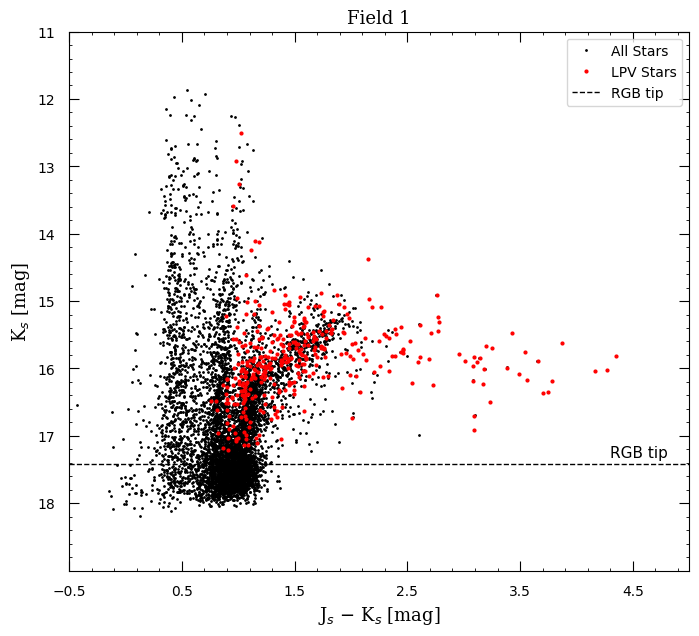

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-gmoert0a
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-gmoert0a
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 8316e67aa8d5f03931b6aa7743d9d8db596366f4
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2586 sha256=63e08d623111e09679544849ccdb3a15371f38b1a987fe8fd6a6edc254ae2326
  Stored in directory: /tmp/pip-ephem-wheel-cache-4kxq8sqb/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:06:03 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHKLMN</i> (cf. Bessell 1990 + Bessell & Brett 1988)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 48

In [13]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:12:31 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag,Lmag,L'mag,Mmag
0,0.00015,-2.01557,6.60,0.094150,1.120297,0.094,-1.473,3.5651,4.097,0,...,12.197,10.394,9.303,8.291,7.057,6.378,6.116,5.844,5.763,5.779
1,0.00015,-2.01557,6.60,0.099707,1.168651,0.099,-1.445,3.5678,4.104,0,...,12.083,10.302,9.219,8.220,6.994,6.317,6.053,5.787,5.707,5.722
2,0.00015,-2.01557,6.60,0.104076,1.204282,0.104,-1.423,3.5698,4.109,0,...,11.996,10.229,9.153,8.163,6.945,6.268,6.003,5.740,5.662,5.676
3,0.00015,-2.01557,6.60,0.108670,1.239703,0.108,-1.401,3.5719,4.114,0,...,11.930,10.168,9.093,8.106,6.887,6.212,5.950,5.687,5.605,5.621
4,0.00015,-2.01557,6.60,0.123928,1.344666,0.124,-1.330,3.5780,4.125,0,...,11.727,9.978,8.905,7.923,6.701,6.032,5.777,5.513,5.421,5.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18000,0.00015,-2.01557,10.05,0.817766,2.424783,0.789,3.164,3.6511,0.728,7,...,-0.306,-1.787,-2.585,-3.367,-4.389,-5.112,-5.252,-5.352,-5.368,-5.312
18001,0.00015,-2.01557,10.05,0.817767,2.424783,0.789,3.190,3.6493,0.694,7,...,-0.325,-1.833,-2.642,-3.431,-4.461,-5.189,-5.330,-5.431,-5.448,-5.388
18002,0.00015,-2.01557,10.05,0.817767,2.424783,0.789,3.243,3.6456,0.627,7,...,-0.359,-1.924,-2.756,-3.561,-4.608,-5.346,-5.488,-5.592,-5.609,-5.542
18003,0.00015,-2.01557,10.05,0.817768,2.424783,0.789,3.281,3.6399,0.566,8,...,-0.311,-1.956,-2.822,-3.649,-4.722,-5.477,-5.622,-5.730,-5.748,-5.669


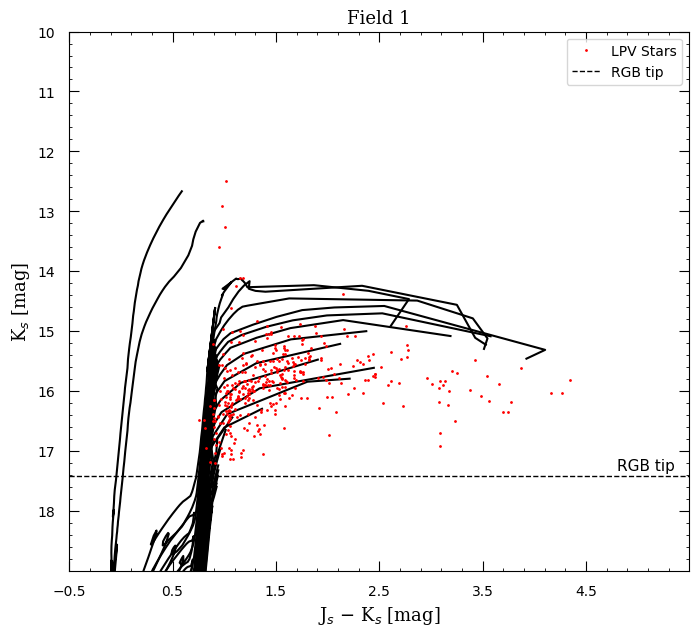

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.00015,-2.01557,6.60,0.094150,1.120297,0.094,-1.473,3.5651,4.097,0,...,0.000159,8.453,14.070,12.194,10.391,9.258,8.278,7.047,6.374,6.113
1,0.00015,-2.01557,6.60,0.099707,1.168651,0.099,-1.445,3.5678,4.104,0,...,0.000159,8.384,13.920,12.081,10.298,9.174,8.207,6.984,6.312,6.051
2,0.00015,-2.01557,6.60,0.104076,1.204282,0.104,-1.423,3.5698,4.109,0,...,0.000159,8.329,13.805,11.993,10.226,9.108,8.150,6.935,6.263,6.001
3,0.00015,-2.01557,6.60,0.108670,1.239703,0.108,-1.401,3.5719,4.114,0,...,0.000159,8.273,13.706,11.927,10.165,9.049,8.093,6.877,6.208,5.947
4,0.00015,-2.01557,6.60,0.123928,1.344666,0.124,-1.330,3.5780,4.125,0,...,0.000159,8.096,13.404,11.725,9.975,8.861,7.910,6.691,6.027,5.774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18342,0.00015,-2.01557,10.05,0.817767,2.424783,0.789,3.190,3.6493,0.694,7,...,0.000159,-3.206,0.785,-0.327,-1.835,-2.677,-3.442,-4.471,-5.192,-5.330
18343,0.00015,-2.01557,10.05,0.817767,2.424783,0.789,3.243,3.6456,0.627,7,...,0.000159,-3.338,0.838,-0.361,-1.926,-2.792,-3.571,-4.617,-5.349,-5.488
18344,0.00015,-2.01557,10.05,0.817768,2.424783,0.789,3.281,3.6399,0.566,8,...,0.000141,-3.432,1.006,-0.314,-1.958,-2.860,-3.660,-4.731,-5.481,-5.622
18345,0.00015,-2.01557,10.05,0.817769,2.424784,0.752,2.956,3.6615,0.956,8,...,0.000141,-2.620,0.815,-0.032,-1.364,-2.133,-2.854,-3.834,-4.524,-4.658


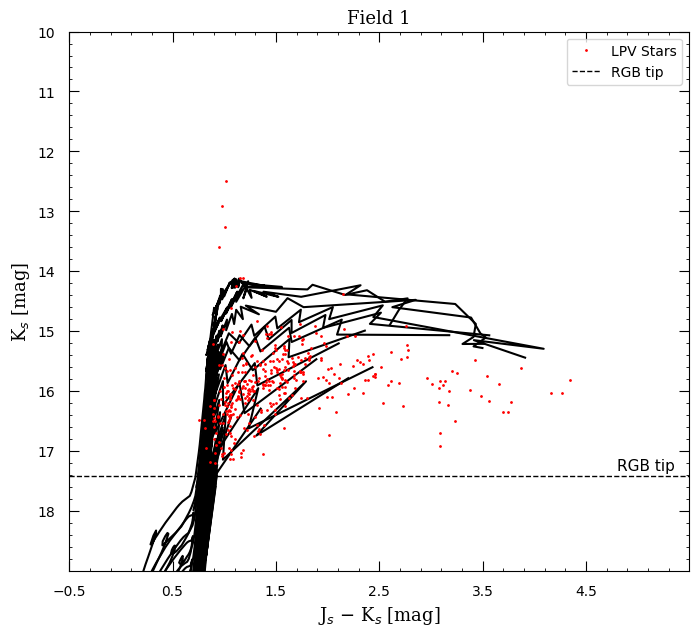

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [18]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [19]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

Unfortunately, the machine calculates wrong X for peak. So we set it manually.

In [20]:
X_peak_limit = 1.1

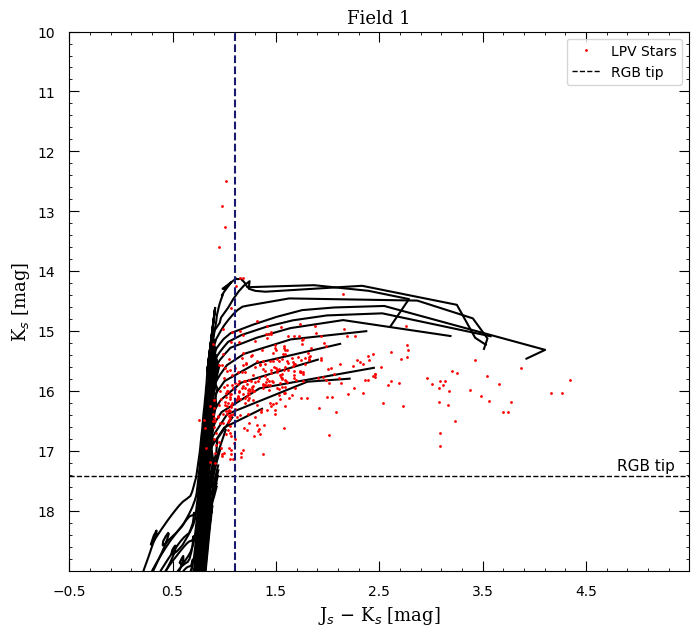

In [21]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [22]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [23]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 :
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [24]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [25]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 :
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [26]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : -0.3634088453075232
Slope_O : 0.10496970950329747


We can not have a negative slope. So we add these two parameters manually.

In [27]:
# From Z = 0.0005
Slope_C = 0.38
# From ....
Slope_O = 0.5

In [28]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.38
Slope_O : 0.5


Slope : Visualization

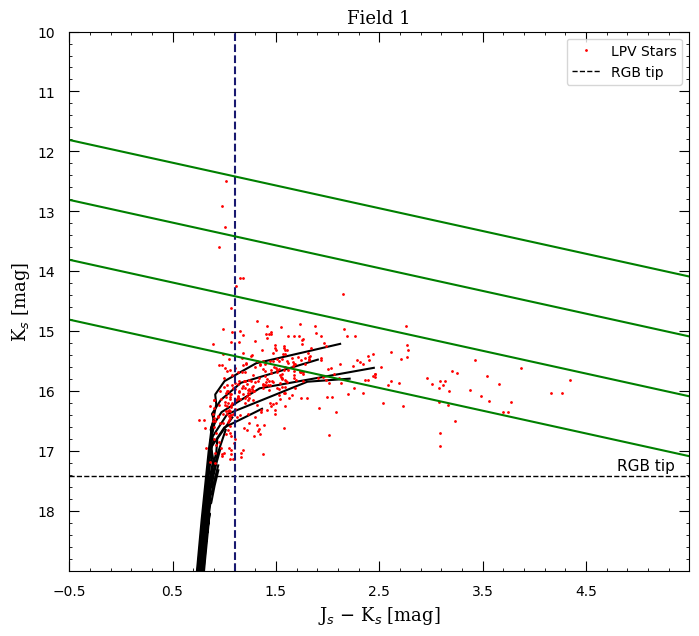

In [29]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

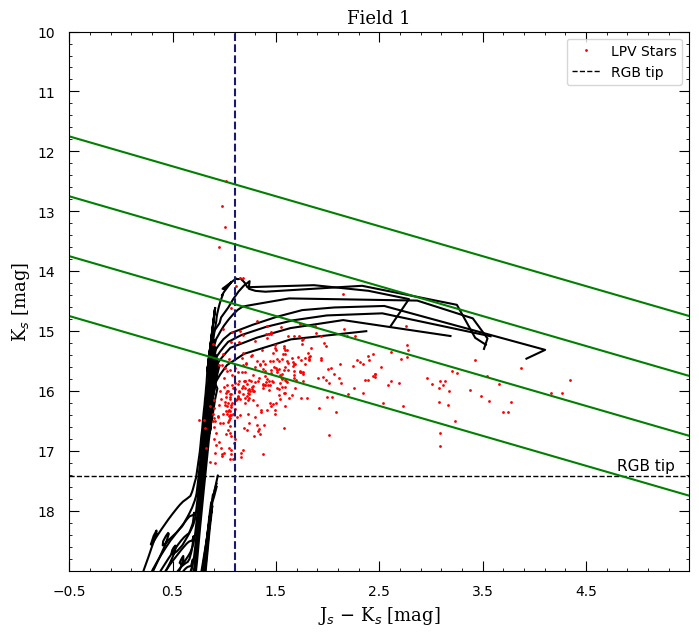

In [30]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [31]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [32]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

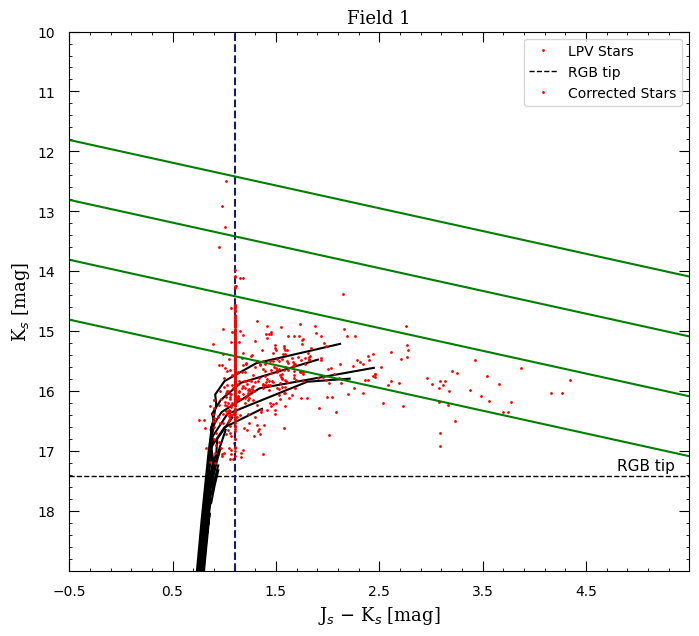

In [33]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [34]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [35]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.00015,-0.200,-0.641,NaN,-11.832
1,0.00015,-0.186,-0.472,-11.832,-11.363
2,0.00015,-0.267,-1.393,-11.363,-10.894
3,0.00015,-0.561,-4.598,-10.894,-10.425
4,0.00015,-0.336,-2.252,-10.425,-9.956
5,0.00015,-0.989,-8.760,-9.956,-9.487
6,0.00015,-0.234,-1.589,-9.487,-9.018
7,0.00015,-0.277,-1.983,-9.018,-8.550
8,0.00015,-0.093,-0.404,-8.550,-8.081
9,0.00015,-0.172,-1.048,-8.081,-7.612


In [36]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [37]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [38]:
print(f'a: {a}   b: {b}')

a: -0.093   b: -0.404


$Log(M/M_s) = a \times K_s + b$

In [39]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [40]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

0
C Star --> 0
1
C Star --> 1
2
C Star --> 2
3
C Star --> 3
4
C Star --> 4
5
C Star --> 5
6
C Star --> 6
7
C Star --> 7
8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
16
C Star --> 16
17
C Star --> 17
18
C Star --> 18
19
C Star --> 19
20
C Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
C Star --> 24
25
C Star --> 25
26
C Star --> 26
27
C Star --> 27
29
C Star --> 29
31
C Star --> 31
32
C Star --> 32
33
C Star --> 33
35
C Star --> 35
37
C Star --> 37
39
C Star --> 39
40
C Star --> 40
41
C Star --> 41
43
C Star --> 43
45
C Star --> 45
46
C Star --> 46
47
C Star --> 47
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
C Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66


In [41]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.9820,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950


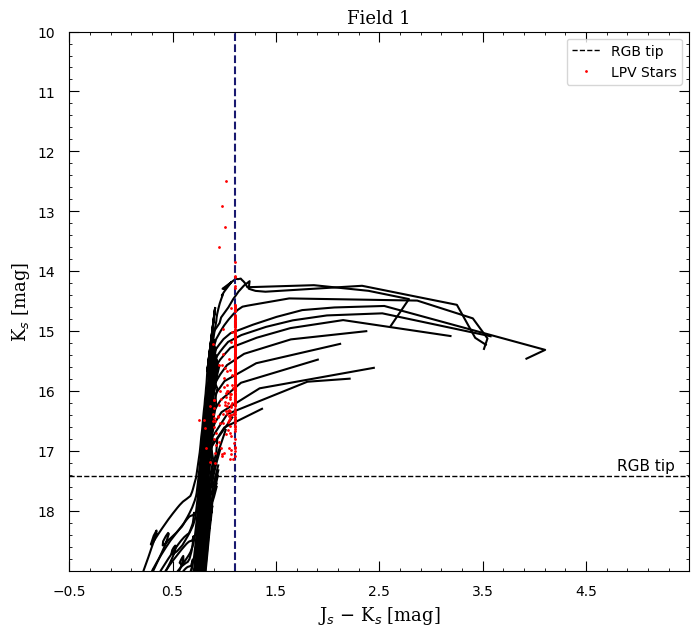

In [42]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [43]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.9820,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [44]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [45]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
14,0.00015,-0.200,-0.641,NaN,-11.832
15,0.00015,-0.186,-0.472,-11.832,-11.363
16,0.00015,-0.267,-1.393,-11.363,-10.894
17,0.00015,-0.561,-4.598,-10.894,-10.425
18,0.00015,-0.336,-2.252,-10.425,-9.956
19,0.00015,-0.989,-8.760,-9.956,-9.487
20,0.00015,-0.234,-1.589,-9.487,-9.018
21,0.00015,-0.277,-1.983,-9.018,-8.550
22,0.00015,-0.093,-0.404,-8.550,-8.081
23,0.00015,-0.172,-1.048,-8.081,-7.612


In [46]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [47]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.093   b: -0.404


In [48]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [49]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.236952,1.725647
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.232346,1.707444
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.227832,1.689787
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.229633,1.696810
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.165618,1.464261
...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.9820,C,0.253948,1.068,0.077176,1.194472
372,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.048420,1.117944
373,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.168480,14.739407
374,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.991540,9.807086


(array([ 49., 197., 121.,   4.,   1.,   0.,   1.,   1.,   1.,   1.]),
 array([0.03568 , 0.185177, 0.334674, 0.484171, 0.633668, 0.783165,
        0.932662, 1.082159, 1.231656, 1.381153, 1.53065 ]),
 <BarContainer object of 10 artists>)

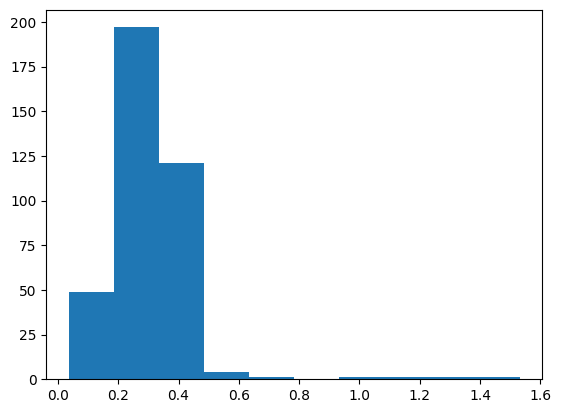

In [50]:
plt.hist(df_final['Log(M/Ms)'])

(array([371.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ 1.08562541,  4.37057964,  7.65553387, 10.9404881 , 14.22544234,
        17.51039657, 20.7953508 , 24.08030503, 27.36525926, 30.65021349,
        33.93516772]),
 <BarContainer object of 10 artists>)

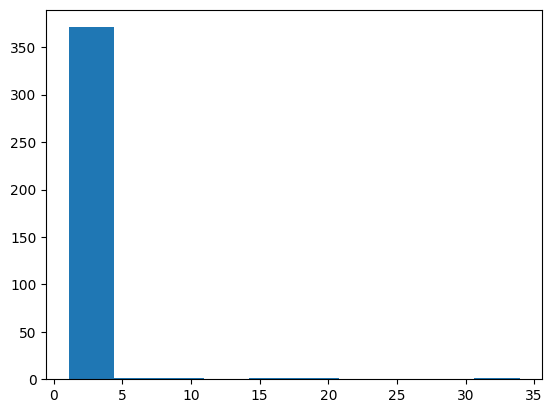

In [51]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [52]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [53]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
8,0.00015,-3.205,9.764,NaN,0.125
9,0.00015,-2.672,9.698,0.125,0.367
10,0.00015,-2.368,9.586,0.367,0.609
11,0.00015,-1.996,9.359,0.609,0.851
12,0.00015,-1.676,9.087,0.851,1.093
13,0.00015,-1.249,8.620,1.093,1.335
14,0.00015,-0.871,8.117,1.335,1.576
15,0.00015,-0.601,7.691,1.576,NaN


In [54]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [55]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.368   b: 9.586


In [56]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.317

In [57]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [58]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.236952,1.725647,9.064864,1.161086e+09
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.232346,1.707444,9.077170,1.194457e+09
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.227832,1.689787,9.089233,1.228098e+09
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.229633,1.696810,9.084420,1.214563e+09
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.165618,1.464261,9.255468,1.800809e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.9820,C,0.253948,1.068,0.077176,1.194472,9.516651,3.285874e+09
372,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.048420,1.117944,9.608814,4.062692e+09
373,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.168480,14.739407,7.160568,1.447333e+07
374,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.991540,9.807086,7.425179,2.661822e+07


(array([  2.,   1.,   1.,   1.,   2.,   9., 111., 155.,  71.,  23.]),
 array([6.78380385, 7.07038803, 7.3569722 , 7.64355638, 7.93014055,
        8.21672473, 8.5033089 , 8.78989308, 9.07647725, 9.36306143,
        9.6496456 ]),
 <BarContainer object of 10 artists>)

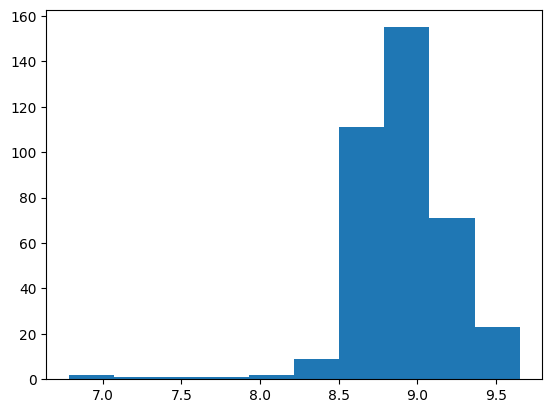

In [59]:
plt.hist(df_final['Log(t)'])

(array([ 35., 167., 105.,  33.,  11.,   5.,   4.,   8.,   5.,   3.]),
 array([6.07860398e+06, 4.51789974e+08, 8.97501345e+08, 1.34321272e+09,
        1.78892409e+09, 2.23463546e+09, 2.68034683e+09, 3.12605820e+09,
        3.57176957e+09, 4.01748094e+09, 4.46319231e+09]),
 <BarContainer object of 10 artists>)

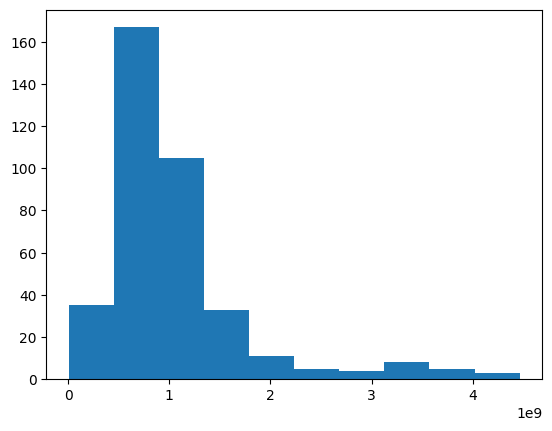

In [60]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [61]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [62]:
Mass_Pulsation

,Z,I,a,b,c,D
4,0.00015,1,8.078,1.800,0.250,-9.812
5,0.00015,2,6.245,0.304,0.525,0.000
6,0.00015,3,2.626,0.679,0.217,0.000
7,0.00015,4,5.737,1.301,0.329,0.000


In [63]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D

In [64]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 6.245   b: 0.304  c: 0.525  D: -9.812


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [65]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)

  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [66]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.236952,1.725647,9.064864,1.161086e+09,5.438408,274414.967794
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.232346,1.707444,9.077170,1.194457e+09,5.433029,271037.442142
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.227832,1.689787,9.089233,1.228098e+09,5.427125,267377.661239
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.229633,1.696810,9.084420,1.214563e+09,5.429556,268878.729905
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.165618,1.464261,9.255468,1.800809e+09,5.279094,190148.784079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.9820,C,0.253948,1.068,0.077176,1.194472,9.516651,3.285874e+09,4.887475,77174.724540
372,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.048420,1.117944,9.608814,4.062692e+09,4.724668,53047.863153
373,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.168480,14.739407,7.160568,1.447333e+07,2.671183,469.011029
374,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.991540,9.807086,7.425179,2.661822e+07,1.435485,27.257457


(array([  1.,   0.,   0.,   1.,   2.,   0.,   1.,   1.,  21., 349.]),
 array([1.43548534, 1.83789626, 2.24030719, 2.64271811, 3.04512904,
        3.44753996, 3.84995089, 4.25236181, 4.65477274, 5.05718366,
        5.45959459]),
 <BarContainer object of 10 artists>)

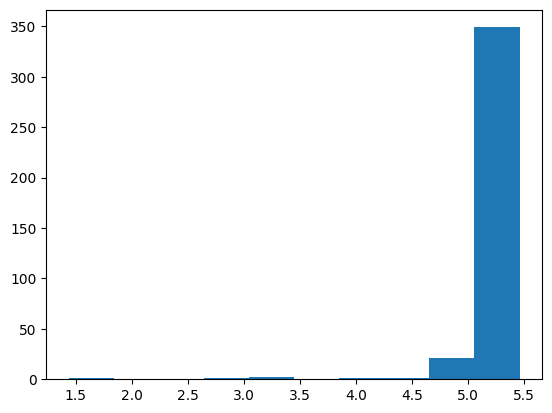

In [67]:
plt.hist(df_final['Log(dt)'])

(array([  5.,   4.,  13.,   5.,   4.,   6.,  11.,  30., 118., 180.]),
 array([2.72574573e+01, 2.88379368e+04, 5.76486162e+04, 8.64592955e+04,
        1.15269975e+05, 1.44080654e+05, 1.72891334e+05, 2.01702013e+05,
        2.30512692e+05, 2.59323372e+05, 2.88134051e+05]),
 <BarContainer object of 10 artists>)

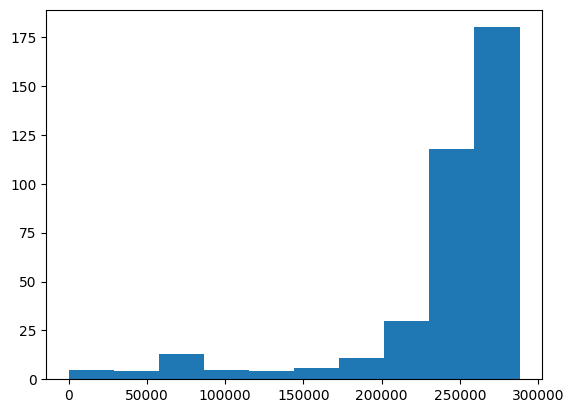

In [68]:
plt.hist(df_final['dt'])

## Data Saving

In [69]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)